# " Determinantes del Ingreso en el Cine: Análisis de Presupuesto y Popularidad (1980-2020) "

    Usaremos librerías como: pandas, matplotlib, seaborn, y scipy.stats para el análisis de datos y visualización de gráficas.

📌Puedes descargar la data aquí:👉👉 https://github.com/WLozanoH/MovieSuccess-Factors-Analysis/blob/main/data-movies.zip

In [776]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [777]:
df = pd.read_csv('data-movies.csv')

In [778]:
#vista general a la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [779]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning data

    Observamos si hay datos faltantes
    Let's see if there is any missing data

In [780]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [781]:
#observamos el porcentaje de data faltante
for i, col in enumerate(df.columns):
    percent_missing = df[col].isnull().mean() *100
    print(f'{i}- {col}: {percent_missing:.1f}%')

0- name: 0.0%
1- rating: 1.0%
2- genre: 0.0%
3- year: 0.0%
4- released: 0.0%
5- score: 0.0%
6- votes: 0.0%
7- director: 0.0%
8- writer: 0.0%
9- star: 0.0%
10- country: 0.0%
11- budget: 28.3%
12- gross: 2.5%
13- company: 0.2%
14- runtime: 0.1%


In [782]:
#observando data en 'budget' con data faltante = 28.3%
df['budget'].head()

0    19000000.0
1     4500000.0
2    18000000.0
3     3500000.0
4     6000000.0
Name: budget, dtype: float64

Orden de corrección:

        eliminamos los valores nulos
        cambiamos el tipo de dato de 'float' a 'INT'


In [783]:
#'budget' tiene un porcentaje de valores nulos de 28.3%; dado que existen películas que se realizaron con cero presupuesto
#completaremos la data con cero
print(df['budget'].isnull().sum())
df['budget'] = df['budget'].fillna(0)
print(df['budget'].isnull().sum()) #verificamos que los valores nulos hayan desaparecido

2171
0


In [784]:
#convirtiendo el tipo de dato de 'budget' a 'INT'
df['budget'] = df['budget'].astype(int)

In [785]:
#observamos nuevamente el porcentaje de data faltante
for i, col in enumerate(df.columns):
    percent_missing = df[col].isnull().mean() *100
    print(f'{i}- {col}: {percent_missing:.1f}%')

0- name: 0.0%
1- rating: 1.0%
2- genre: 0.0%
3- year: 0.0%
4- released: 0.0%
5- score: 0.0%
6- votes: 0.0%
7- director: 0.0%
8- writer: 0.0%
9- star: 0.0%
10- country: 0.0%
11- budget: 0.0%
12- gross: 2.5%
13- company: 0.2%
14- runtime: 0.1%


In [786]:
#eliminamos valores nulos(NAN, na) menor a 3%
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(7668, 15)
(7412, 15)


In [787]:
#eliminamos valores duplicados
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(7412, 15)
(7412, 15)


In [788]:
#observando 'gross'
df['gross'].head()

0     46998772.0
1     58853106.0
2    538375067.0
3     83453539.0
4     39846344.0
Name: gross, dtype: float64

In [789]:
#cambiando tipo de dato de 'gross' a 'INT'
df['gross'] = df['gross'].astype(int)

In [790]:
#La data se ve bien
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   int64  
 12  gross     7412 non-null   int64  
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 926.5+ KB


In [791]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [792]:
df[['year','released']].head(20)

,year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
5,1980,"May 9, 1980 (United States)"
6,1980,"June 20, 1980 (United States)"
7,1980,"December 19, 1980 (United States)"
8,1980,"June 19, 1981 (United States)"
9,1980,"May 16, 1980 (United States)"


In [793]:
#Arreglando la variable 'released'
#usamos la función 'extract' para buscar una expresión regular que coincida con el formato de la fecha de lanzamiento
df['released'] = df['released'].str.extract(r'(\d{4})')

In [794]:
#Convirtiendo a tipo 'int'
df['released'] = df['released'].astype(int)
## Convertir la columna 'released' a formato de fecha
df['released'] = pd.to_datetime(df['released'], format='%Y')

In [795]:
#convirtiendo 'votes' a de tipo 'float' a 'int'
df['votes'] = df['votes'].astype(int)
#convirtiendo 'runtime' de tipo 'float' a 'int' (está en minutos)
df['runtime'] = df['runtime'].astype(int)

In [796]:
#la data está bien
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7412 non-null   object        
 1   rating    7412 non-null   object        
 2   genre     7412 non-null   object        
 3   year      7412 non-null   int64         
 4   released  7412 non-null   datetime64[ns]
 5   score     7412 non-null   float64       
 6   votes     7412 non-null   int64         
 7   director  7412 non-null   object        
 8   writer    7412 non-null   object        
 9   star      7412 non-null   object        
 10  country   7412 non-null   object        
 11  budget    7412 non-null   int64         
 12  gross     7412 non-null   int64         
 13  company   7412 non-null   object        
 14  runtime   7412 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 926.5+ KB


In [797]:
#analizando las variables numericas
df.describe() 

##std <> 0, por lo que los datos son diferentes(no hay valor unico)

,year,released,score,votes,budget,gross,runtime
count,7412.000000,7412,7412.000000,7.412000e+03,7.412000e+03,7.412000e+03,7412.000000
mean,2000.640718,2000-11-06 05:41:09.293038208,6.396910,9.076357e+04,2.633644e+07,7.899355e+07,107.446438
min,1980.000000,1980-01-01 00:00:00,1.900000,1.050000e+02,0.000000e+00,3.090000e+02,63.000000
25%,1991.000000,1991-10-01 18:00:00,5.800000,1.000000e+04,0.000000e+00,4.633888e+06,95.000000
50%,2001.000000,2001-01-01 00:00:00,6.500000,3.400000e+04,1.300000e+07,2.040352e+07,104.000000
75%,2010.000000,2010-01-01 00:00:00,7.100000,9.600000e+04,3.302500e+07,7.644231e+07,116.000000
max,2020.000000,2020-01-01 00:00:00,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000
std,11.028736,NaN,0.963162,1.653466e+05,3.897175e+07,1.662164e+08,18.517471


Si hubiera variables 'categóricas' se analiza si tienen un solo subnivel, pero como no lo hay, continuamos...

* verificando valores atípicos

    Para variables numéricas = gráfico de boxplot

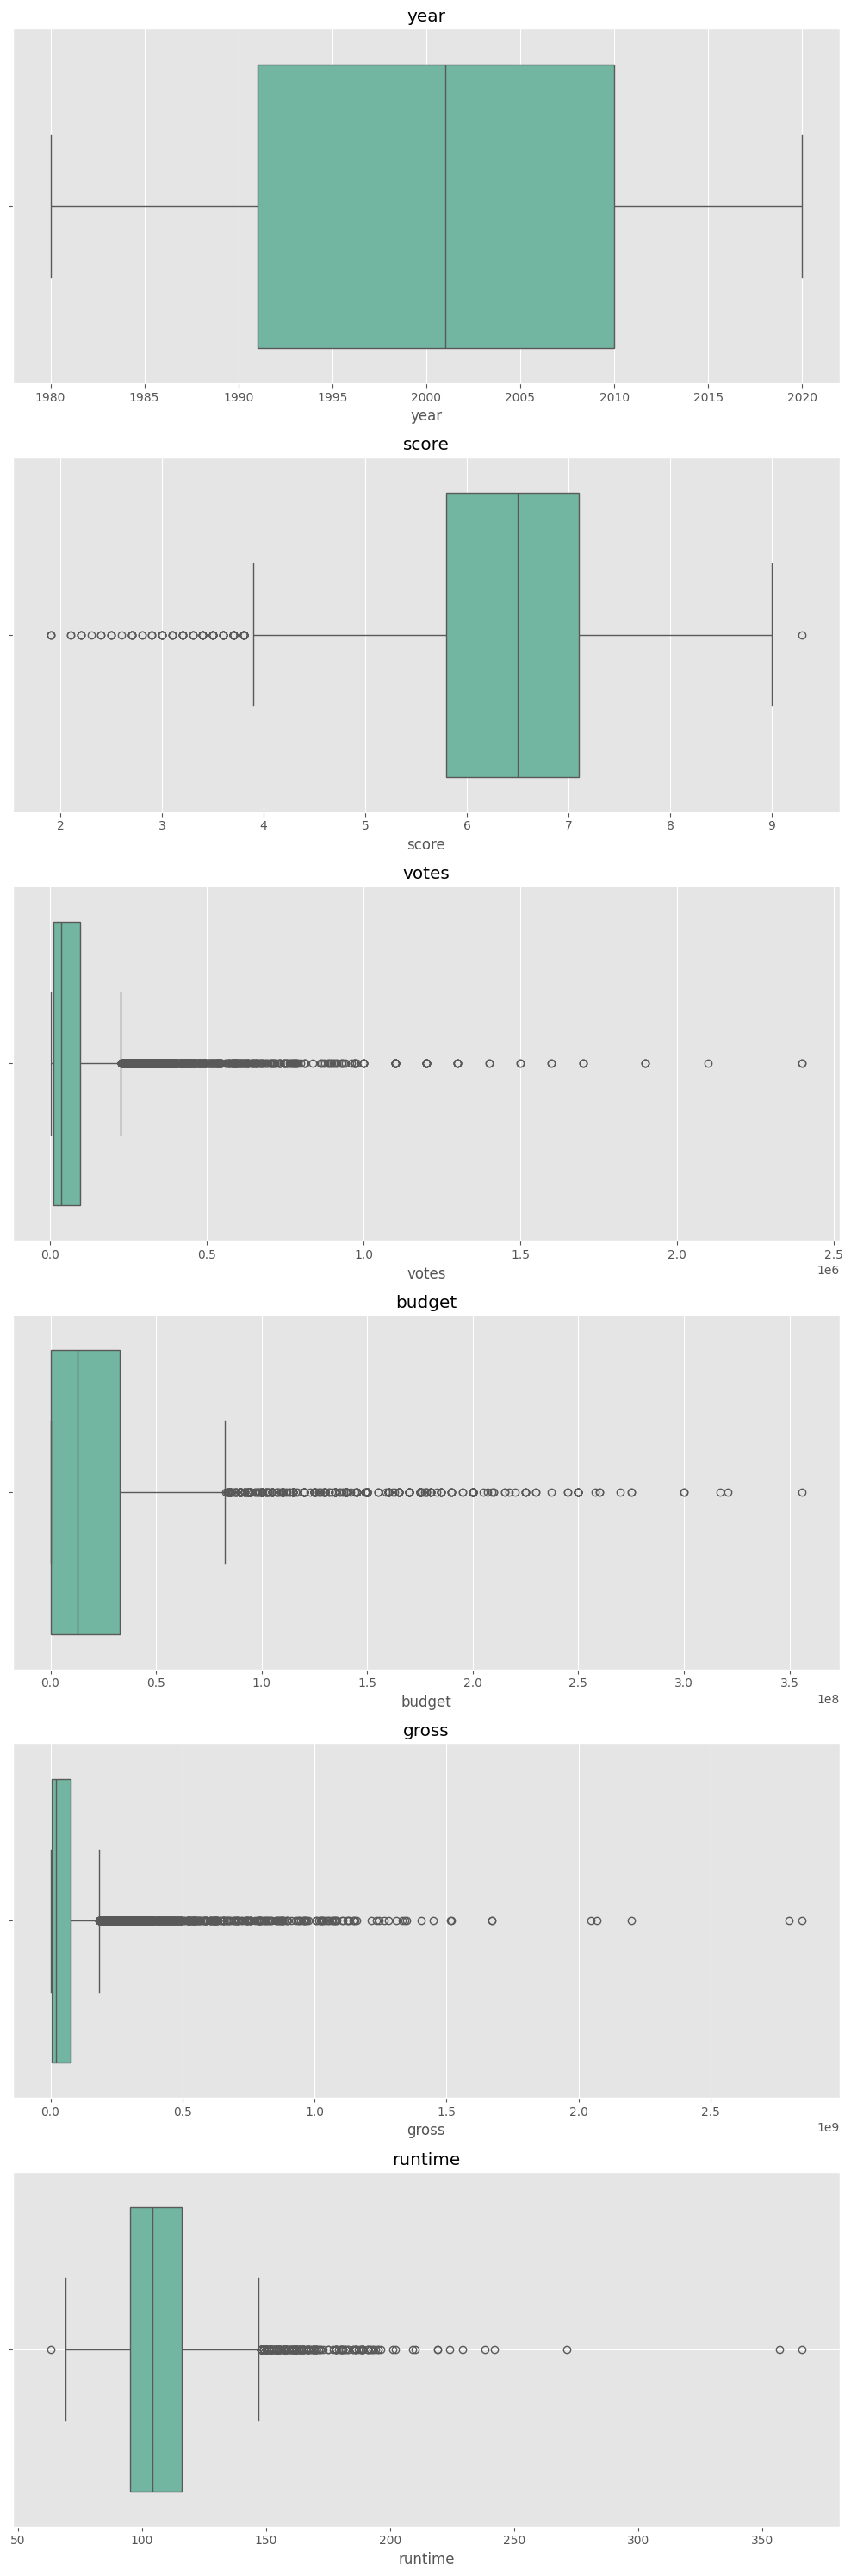

In [798]:
#verificamos valores atipicos en variables numericas con grafico boxplot
cols_num = df.select_dtypes(include=['int', 'float'])

#definimos dimensiones para la gráfica
fig,ax = plt.subplots(6,1,figsize=(10,30)) #nrows = 6, ncols = 1
#creamos gráfica boxplot para cada columna numerica
for i, col in enumerate(cols_num):
    #definimos el gráfico
    sns.boxplot(x=col, data=df, ax=ax[i],palette='Set2')
    ax[i].set_title(col)
    
#Líneas para la gráfica
plt.grid()
#Ajustamos la gráfica
plt.tight_layout()
#Mostramos la gráfica
plt.show()



Observaciones: 

        * Valores atípicos:

            runtime < 50 
            runtime > 250
            
        La duración de esas películas exceden el rango mínimo y máximo de una película normal.
        Pero existen y tienen ingresos brutos(gross) por lo que no vamos a eliminarlas.
        Algunas de ellas tienen un presupuesto(budget) de cero.

## Análisis exploratorio

buscamos que variables tienen una correlacion más fuerte con el nivel de ingresos bruto = 'gross'

In [799]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [800]:
#Eliminamos variables irrelevantes
print(df.shape)
df = df.drop(columns=['year'])
print(df.shape)

(7412, 15)
(7412, 14)


## Análisis Individual

            Observamos la distribucion de los datos
            variables numericas: histograma

In [801]:
cols_num = df.select_dtypes(include=['int','float'])

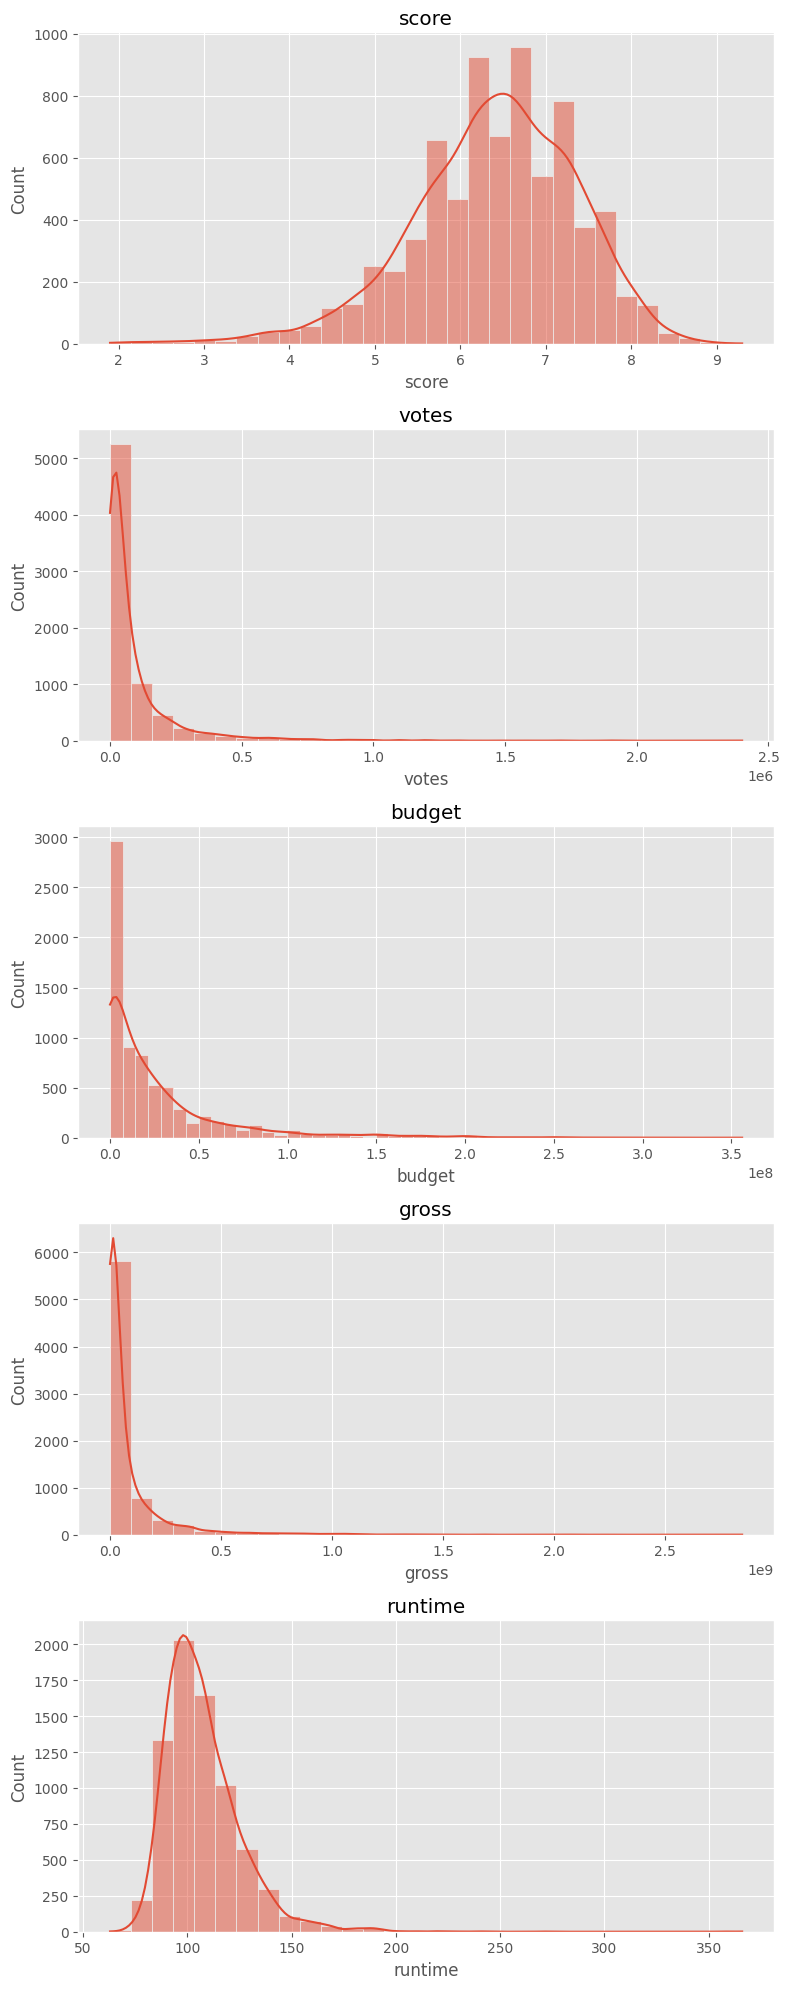

In [802]:
#definiendo la dimensión de la gráfica
fig,ax = plt.subplots(5,1,figsize=(8,20)) # 6 filas y 1 columna, tamaño de la figura 10x15
fig.subplots_adjust(hspace=0.5)
#iteramos sobre cada columna
for i,col in enumerate(cols_num):
    if col == 'budget':
        nbins = 50
    else:
        nbins = 30
    #creamos la gráfica
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True, palette='Set2')
    ax[i].set_title(col)
    
#Ajustamos diseño de la gráfica
plt.tight_layout()
plt.show()

In [803]:
cols_num.describe()

,score,votes,budget,gross,runtime
count,7412.000000,7.412000e+03,7.412000e+03,7.412000e+03,7412.000000
mean,6.396910,9.076357e+04,2.633644e+07,7.899355e+07,107.446438
std,0.963162,1.653466e+05,3.897175e+07,1.662164e+08,18.517471
min,1.900000,1.050000e+02,0.000000e+00,3.090000e+02,63.000000
25%,5.800000,1.000000e+04,0.000000e+00,4.633888e+06,95.000000
50%,6.500000,3.400000e+04,1.300000e+07,2.040352e+07,104.000000
75%,7.100000,9.600000e+04,3.302500e+07,7.644231e+07,116.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


* Observamos que:

Ambas variables tienen asimetría positiva, es decir la mayor cantidad de sus datos están sesgados hacia el lado derecho,
budget: 0-33millones($) y votes: 0-96mil.

    'budget': tiene promedio de 26 millones($) y el 75 % de las películas tienen un presupuesto inferior a 33 millones($)
    y el 50%, inferior a 13 millones($).

    'votes': tiene promedio de 90 mil(votos) y el 75 % de las películas tienen menos de 96mil(votos).

    'score': el 75 % de las películas tienen una puntuación menor a 7.1 .

    'gross': el 75% de las películas tienen un ingreso bruto inferior a 76 millones($)

    'runtime': el 75% de las películas tienen una duración inferior a 116 minutos equivalente a casi 2 horas.


## ANÁLISIS UNIVARIADO

Usamos un mapa de calor para identificar que variables tienen mayor correlacion con 'gross' y proceder a analizarlas

In [804]:
cols_num.columns

Index(['score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')

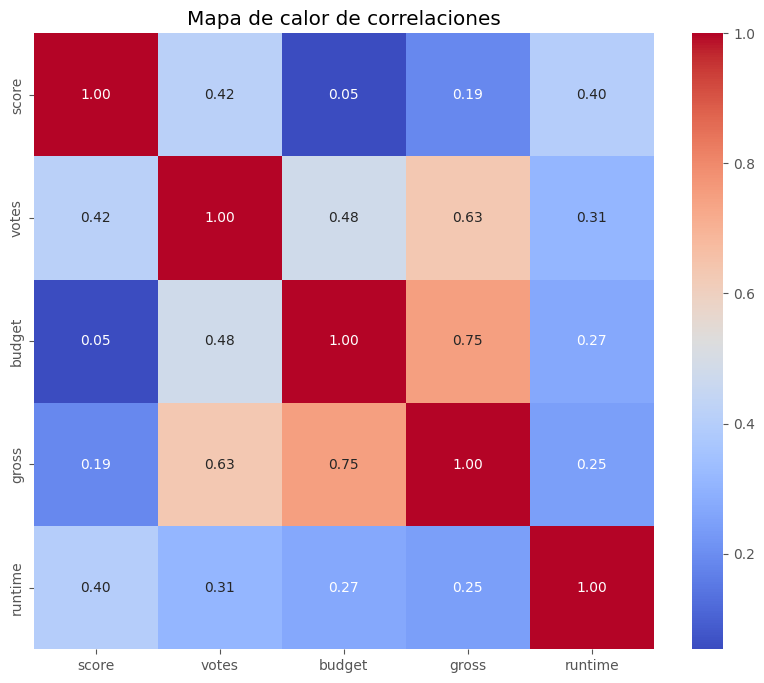

In [805]:
#existen diversos tipos de correlación, como Pearson, Spearman, Kendall, etc.
#En este caso, usamos Pearson, que es el más común y viene por defecto en pandas.

#calculamos la matriz de correlación
correlacion = cols_num.corr()

#creamos el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()

Variables numéricas a analizar: porcentaje de correlación

        budget(0.75)
        votes(0.63)

In [806]:
#Analizamos la correlación de las variables a través de un gráfico de dispersión
def GraficarUni(variable_predictora, variable_predecible, type = 'line', title = '', xlabel = None, ylabel = None):
    x = variable_predictora
    y = variable_predecible
    if type == 'line':
        plt.figure(figsize=(10,6))
        sns.lineplot(x=variable_predictora, y=variable_predecible, data = df, palette = 'Set2',marker='o')
    elif type == 'regplot':
        plt.figure(figsize=(10,6))
        sns.regplot(x=variable_predictora, y=variable_predecible, data = df, scatter_kws={'color':'red','s':10}, line_kws={'color':'blue'}) # 's' controla el tamaño de los puntos
    elif type == 'scatter':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=variable_predictora, y=variable_predecible, data = df, palette = 'Set2')
        
    if xlabel:
        plt.xlabel(xlabel) 
    if ylabel:
        plt.ylabel(ylabel)
        
    plt.grid()
    plt.tight_layout()
    plt.title(title)
    plt.show()


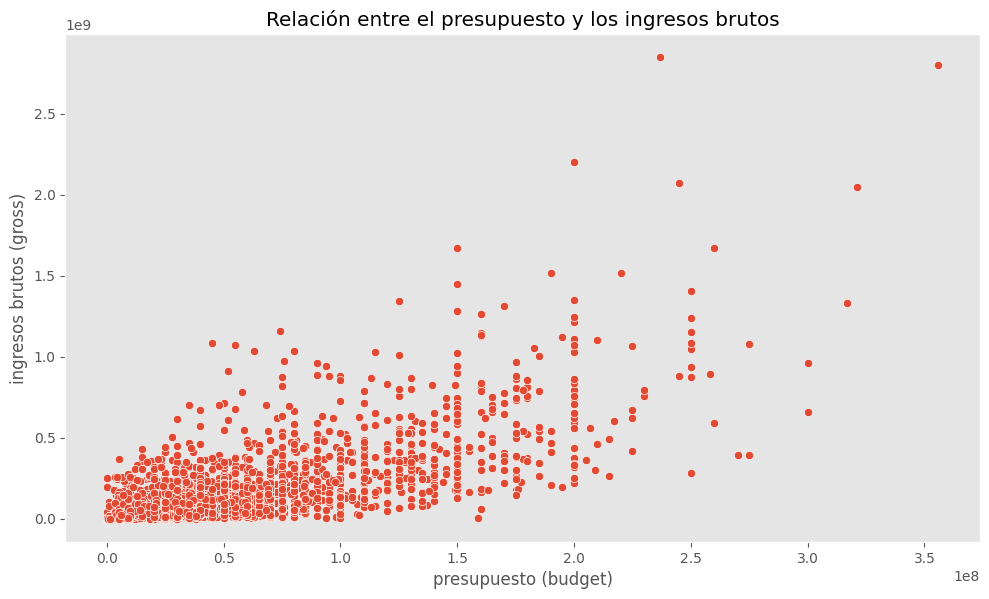

In [823]:
GraficarUni('budget', 'gross', type='scatter', title='Relación entre el presupuesto y los ingresos brutos', xlabel='presupuesto (budget)', ylabel='ingresos brutos (gross)')

Observamos que:

.existe una tendencia lineal entre 'budget' y 'gross', a medida que aumenta el presupuesto de las películas, estas aumentan el nivel de 'ganancias brutas'

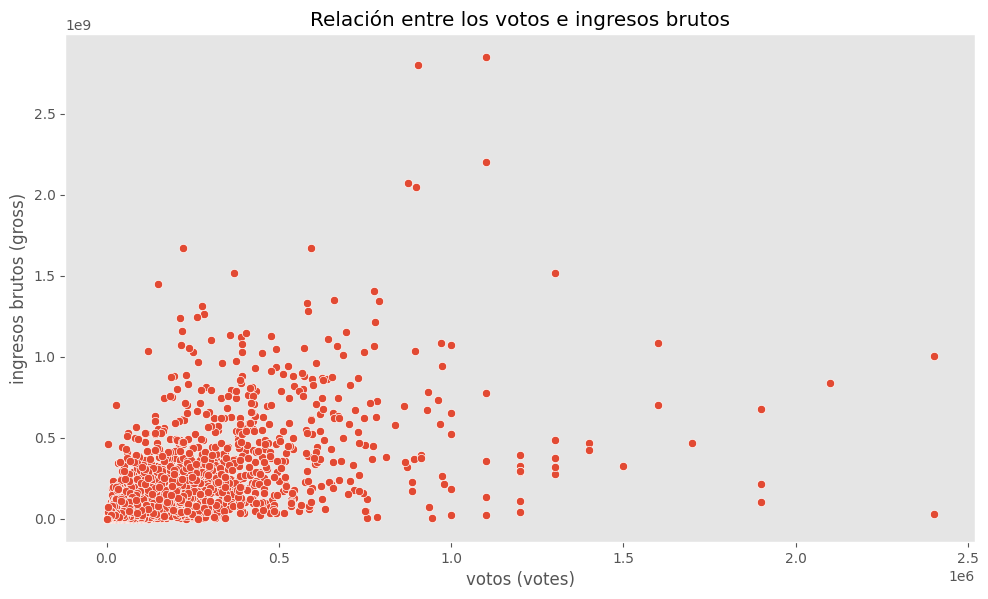

In [824]:
GraficarUni('votes','gross', type = 'scatter', title='Relación entre los votos e ingresos brutos', xlabel='votos (votes)', ylabel= 'ingresos brutos (gross)')

* Se observa una ligera tendencia lineal, a medida que la película es más votada, aumenta el nivel de ganancias ('gross').

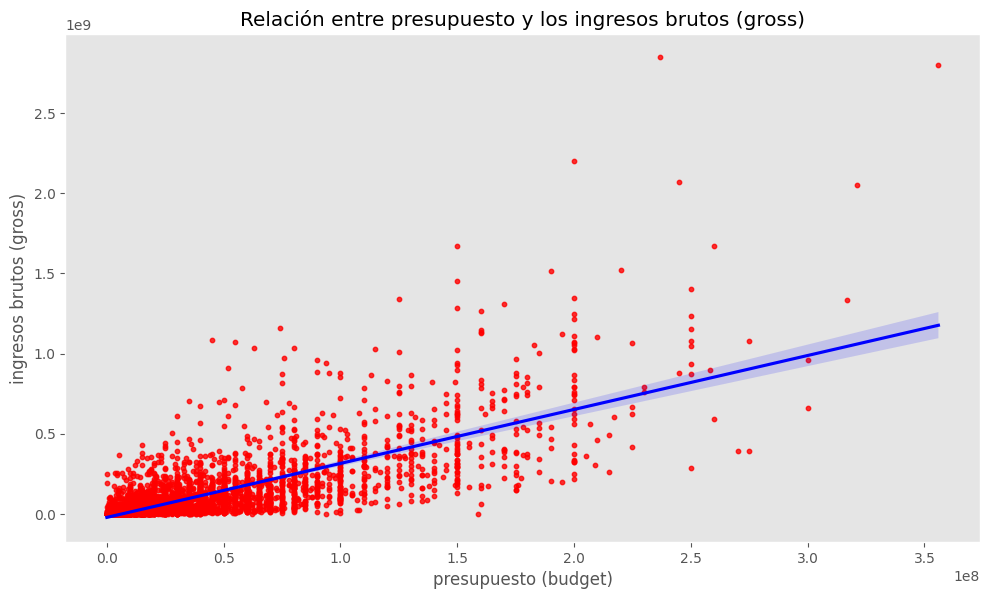

In [825]:
#usamos el gráfico de 'regplot' para observar la regresión lineal
GraficarUni('budget','gross', type='regplot', title='Relación entre presupuesto y los ingresos brutos (gross)', xlabel='presupuesto (budget)', ylabel='ingresos brutos (gross)')

In [826]:
#observamos la correlacion
correlacion

,score,votes,budget,gross,runtime
score,1.000000,0.415190,0.053021,0.188071,0.397226
votes,0.415190,1.000000,0.481902,0.631110,0.309945
budget,0.053021,0.481902,1.000000,0.749330,0.269020
gross,0.188071,0.631110,0.749330,1.000000,0.245117
runtime,0.397226,0.309945,0.269020,0.245117,1.000000


In [827]:
#Convirtiendo las variables 'object' a 'category'
df_numerized = df.copy()
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        #Convertimos las variable a tipo 'category'
        df_numerized[col] = df_numerized[col].astype('category')
        #Asignamos identificadores únicos a las categorías
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1181,2475,5,6,1992-01-01,6.2,2000,1704,2556,959,7,7500000,796368,388,97
1477,4051,5,0,1991-01-01,6.2,16000,1536,591,736,7,7000000,9094451,785,103
1537,1840,0,2,1992-01-01,7.1,7000,1063,367,455,5,35000000,1368000,993,85
1615,524,3,1,1992-01-01,4.8,1000,1378,1837,173,7,16000000,67878,33,93
1659,311,4,3,1991-01-01,7.8,130000,1251,1844,1149,7,31000000,52096475,347,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,327,5,0,2020-01-01,6.6,140000,15,1929,1424,7,90000000,426505244,347,124
7649,2805,3,0,2020-01-01,6.5,102000,711,1864,119,7,85000000,319715683,828,99
7650,896,3,1,2020-01-01,5.6,53000,1509,2283,1150,7,175000000,245487753,1052,101
7651,3127,3,1,2020-01-01,6.8,42000,257,1682,497,1,135000000,111105497,10,100


In [828]:
#observando el dataset original
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1181,Rampage,R,Drama,1992-01-01,6.2,2000,William Friedkin,William P. Wood,Michael Biehn,United States,7500000,796368,De Laurentiis Entertainment Group (DEG),97
1477,Warlock,R,Action,1991-01-01,6.2,16000,Steve Miner,David Twohy,Julian Sands,United States,7000000,9094451,New World Pictures,103
1537,Little Nemo: Adventures in Slumberland,G,Animation,1992-01-01,7.1,7000,Masami Hata,Chris Columbus,Gabriel Damon,Japan,35000000,1368000,TMS Entertainment,85
1615,Brenda Starr,PG,Adventure,1992-01-01,4.8,1000,Robert Ellis Miller,Noreen Stone,Brooke Shields,United States,16000000,67878,AM/PM Entertainment,93
1659,Awakenings,PG-13,Biography,1991-01-01,7.8,130000,Penny Marshall,Oliver Sacks,Robert De Niro,United States,31000000,52096475,Columbia Pictures,121


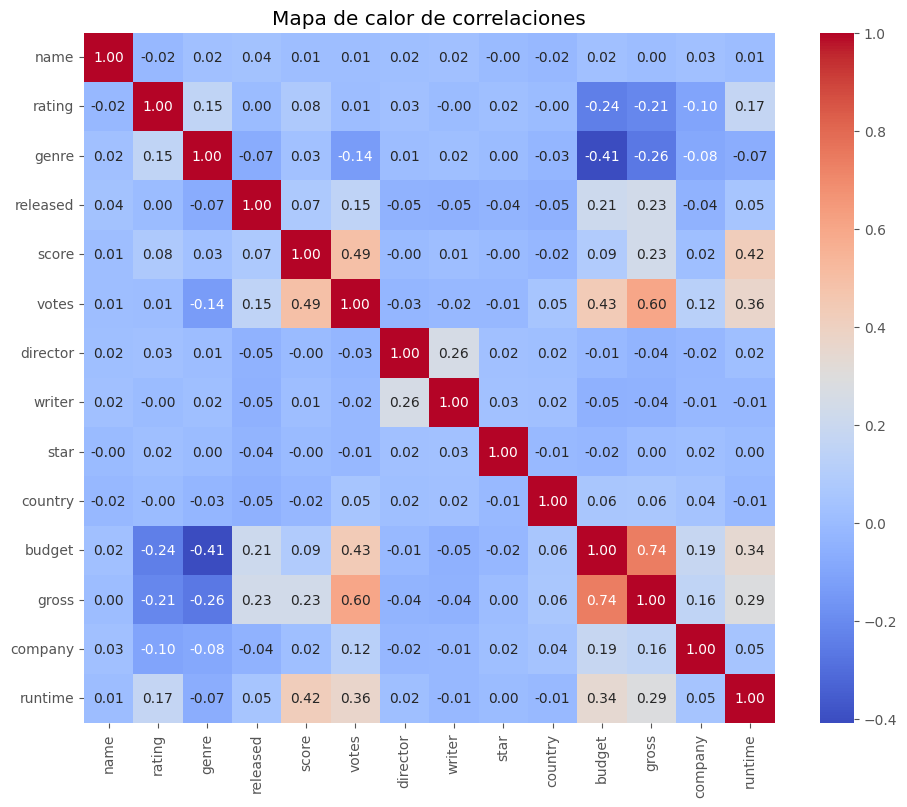

In [829]:
# Haciendo un mapa de calor para el nuevo dataset 'df_numerized'
#calculamos la matriz de correlacion 
correlacion_matrix = df_numerized.corr()

#definimos la gráfica
plt.figure(figsize=(10,8))
#creamos el mapa de calor
sns.heatmap(correlacion_matrix, annot=True,fmt='.2f', cmap='coolwarm', square=True)

#Ajustamos el diseño del gráfico
plt.tight_layout()
plt.title('Mapa de calor de correlaciones')
plt.show()

In [830]:
#Correlacion el parejas
#observamos que variables tienen la correlacion mas alta con respecto a los 'ingresos brutos' (gross)
corr_pairs = correlacion_matrix.unstack()
#Ordenando de la correlación más alta a la más baja.
corr_pairs['gross'].sort_values(ascending=False)

gross       1.000000
budget      0.738635
votes       0.601773
runtime     0.285974
score       0.233120
released    0.229682
company     0.156362
country     0.061150
name        0.004947
star        0.003646
director   -0.039288
writer     -0.042680
rating     -0.211412
genre      -0.264453
dtype: float64

In [831]:
#ordenando los pares de correlación 
sorted_pairs = corr_pairs.sort_values()

#mostrando la correlación mayor a 0.5
highest_corr_pairs = sorted_pairs[(sorted_pairs)> 0.5]
highest_corr_pairs

gross     votes       0.601773
votes     gross       0.601773
gross     budget      0.738635
budget    gross       0.738635
star      star        1.000000
score     score       1.000000
name      name        1.000000
writer    writer      1.000000
votes     votes       1.000000
director  director    1.000000
genre     genre       1.000000
rating    rating      1.000000
released  released    1.000000
budget    budget      1.000000
company   company     1.000000
gross     gross       1.000000
country   country     1.000000
runtime   runtime     1.000000
dtype: float64

Concluimos que:

Las variables que más influyen en el nivel de ingresos brutos ('gross') de una película es:

    'budget'(presupuesto): 0.75
    'votes'(votos): 0.63

# Visualización de la información en Tableau

In [832]:
#Eliminamos las películas con cero presupuesto para calcular el ROI en tableau
print(df.shape)
df = df[df['budget'] >0]
print(df.shape)

(4253, 14)
(4253, 14)


In [833]:
#extraemos el año para filtrar las películas > 1990.
df['year'] = df['released'].dt.year

In [834]:
print(df.shape)
#filtramos las películas de 1990 en adelante.
df = df[df['year']> 1990]
print(df.shape)

(4253, 15)
(4253, 15)


In [835]:
#Filtramos los 8 países con mayor cantidad de películas estrenadas.
top_8_countries = df['country'].value_counts().head(8).index
top_8_countries 

Index(['United States', 'United Kingdom', 'France', 'Canada', 'Germany',
       'Australia', 'China', 'Japan'],
      dtype='object', name='country')

In [836]:
#filtramos la data original
print(df.shape)
df = df[df['country'].isin(top_8_countries)]
print(df.shape)

(4253, 15)
(4253, 15)


In [837]:
#Eliminamos 'year' y guardamos la data
df.drop(columns=['year'],inplace=True)

In [ ]:
#guardamos la data para pasar a visualizarlo en Tableau
ruta = ('C:\\Users\\LENOVO\\Desktop\\Projects\\correlation_movies\\movies_data_cleaned.csv') #ruta donde se guardará el archivo

df.to_csv(ruta,index=False)

📌 Puedes descargar la data procesada aquí: 👉👉 https://github.com/WLozanoH/MovieSuccess-Factors-Analysis/blob/main/movies_data_cleaned.zip

📌 Puedes ver el resultado del dashboard de en el siguiente enlace: 👇👇

✅ https://public.tableau.com/app/profile/wilmer.lozano/viz/AnlisisdeIngresosyROIdePelculas/Dashboard1?publish=yes